<h1>Información bancaria</h1>
<p>Durán Macedo Elliot </p>
<p>López Gámez Luis Antonio</p>
<p>Ritz Flora Carlos Alberto</p>

<h2>Objetivo</h2>
<p>Implementar un modelo predictivo que ayude al banco a evaluar el riesgo crediticio de manera más precisa en nuevas solicitudes. Esto permitirá clasificar a los solicitantes en segmentos de bajo, medio y alto riesgo crediticio, ayudando a los tomadores de decisiones a:</p>
<ul>
    <li>Minimizar las pérdidas por incumplimiento.</li>
    <li>Optimizar la tasa de aprobación para clientes con buen perfil crediticio.</li>
    <li>Mantener y mejorar la relación con clientes actuales y potenciales, adaptando las decisiones de crédito a su perfil específico.  </li>
</ul>

<h2>Problema de negocio</h2>
<p>Un banco grande enfrenta el desafío constante de determinar con precisión el riesgo crediticio de nuevos solicitantes de crédito. La evaluación inexacta de este riesgo puede resultar en pérdidas financieras considerables debido a posibles incumplimientos de pago y, al mismo tiempo, puede generar desconfianza en la relación con clientes potenciales si los criterios son demasiado restrictivos. Es fundamental para el banco mejorar la precisión en la evaluación de estos riesgos con el fin de aprobar créditos a clientes solventes y rechazar aquellos con alta probabilidad de incumplimiento. </p>
<p>Actualmente, la institución bancaria utiliza un conjunto de criterios estándar para aprobar o rechazar solicitudes de crédito. Sin embargo, estos criterios no siempre permiten identificar con precisión a los solicitantes con buen perfil crediticio, lo que conlleva a dos problemas principales: </p>
<ol>
    <li>Aprobación de clientes de alto riesgo: Al no identificar adecuadamente a los solicitantes con antecedentes o características de riesgo, el banco corre el peligro de aprobar créditos a personas con alta probabilidad de incumplimiento. </li>
    <li>Rechazo de clientes solventes: La aplicación de filtros demasiado estrictos puede llevar a la pérdida de clientes con buena capacidad de pago, afectando la rentabilidad a largo plazo y la relación de confianza con el cliente.</li>
</ol>

<h2>Variables importantes y su descripción</h2>
<p>A partir de la información recabada en el DataMart, se decidió mantener las siguientes variables por su aporte en el proyecto:</p>
<table border="2" align="center">
    <tr>
       <td><b>Variable</b></td>
       <td><b>Descripción</b></td>
    </tr>
    <tr>
        <td>TIPO_CTE</td>
        <td>Clasificación preliminar del cliente según su perfil de riesgo o comportamiento pasado.</td>
    </tr>
    <tr>
        <td>MESES_VENCIDOS</td>
        <td>Número de meses que el cliente tiene pagos vencidos.</td>
    </tr>
    <tr>
        <td>INGRESO_INFERIDO</td>
        <td>Estimación del ingreso mensual del cliente.</td>
    </tr>
    <tr>
        <td>NIVEL_RIESGO</td>
        <td> Nivel de riesgo estimado para el cliente en función de su  historial crediticio y otras características.</td>
    </tr>
    <tr>
        <td>SOLICITUDES_RECHAZADAS</td>
        <td>Número de solicitudes rechazadas del cliente.</td>
    </tr>
    <tr>
        <td>SCORE_CLIENTE</td>
        <td>Puntuación general del cliente, calculada por el sistema de reglas de decisión del banco.</td>
    </tr>
    <tr>
        <td>SCORE_COMPORTAMIENTO</td>
        <td>Puntaje que evalúa el comportamiento de pago del cliente en  otros productos crediticios del banco.</td>
    </tr>
    <tr>
        <td>EDAD</td>
        <td>Edad del solicitante.</td>
    </tr>
    <tr>
        <td>TIPO_VIVIENDA</td>
        <td>Tipo de vivienda del solicitante.</td>
    </tr>
    <tr>
        <td>ESCOLARIDAD</td>
        <td>Edad del solicitante.</td>
    </tr>
</table>

<h2>Análisis exploratorio de los datos (EDA)</h2>

<h3>Importar módulos requeridos</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Cargar el dataset</h3>

In [2]:
from inf_bancaria.config import data_path

In [3]:
df = pd.read_csv(data_path)

<h3>Estructura básica del dataset</h3>

In [4]:
df.head(10)

,NUM_SOLICITUD,SUCURSAL,STATUS_SOLICITUD,PUNTO_DECISION,APROBACION_TC,TIPO_CTE,LINEA_CREDITO_FINAL,CUENTA_ASIGNADA,MESES_VENCIDOS,SALDO_CUENTA,...,SCORE_COMPORTAMIENTO,PEOR_MOP_TARJETAS,SUMA_SALDOS_TARJETAS,SUMA_PAGO_MIN_TARJETAS,PEOR_HISTORIA_CREDITO,SUMA_SALDOS_TOTAL,NUM_CREDITOS,EDAD,TIPO_VIVIENDA,ESCOLARIDAD
0,2.010000e+16,4357,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,25,Renta,Preparatoria
1,2.010000e+16,164,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,25,Familiares,Licenciatura
2,2.010000e+16,306,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,25,Familiares,Preparatoria
3,2.010000e+16,951,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,1,1665,450,0,0,0,25,Renta,Posgrado
4,2.010000e+16,522,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,1,30397,1830,0,17050,0,25,Renta,Licenciatura
5,2.010000e+16,4644,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,0,1193,0,0,0,0,25,Propia,Licenciatura
6,2.010000e+16,7796,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,25,Familiares,Preparatoria
7,2.010000e+16,10025,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,25,Familiares,Preparatoria
8,2.010000e+16,50012,Cancelada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,25,Renta,Posgrado
9,2.010000e+16,165,Rechazada,PS1,Rechazado,MALO,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,25,Propia,Licenciatura


In [5]:
df.shape

(4200, 30)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NUM_SOLICITUD            4200 non-null   float64
 1   SUCURSAL                 4200 non-null   int64  
 2   STATUS_SOLICITUD         4200 non-null   object 
 3   PUNTO_DECISION           4200 non-null   object 
 4   APROBACION_TC            4200 non-null   object 
 5   TIPO_CTE                 4200 non-null   object 
 6   LINEA_CREDITO_FINAL      4200 non-null   int64  
 7   CUENTA_ASIGNADA          1281 non-null   float64
 8   MESES_VENCIDOS           1281 non-null   float64
 9   SALDO_CUENTA             1281 non-null   object 
 10  CAPACIDAD_TC             1279 non-null   object 
 11  INGRESO_INFERIDO         4200 non-null   int64  
 12  COMPROBANTE_INGRESOS     4200 non-null   object 
 13  SEGMENTO_CLIENTE         1369 non-null   object 
 14  CLIENTE_CDE             

In [7]:
df.nunique()

NUM_SOLICITUD                 1
SUCURSAL                   1387
STATUS_SOLICITUD              5
PUNTO_DECISION                2
APROBACION_TC                 3
TIPO_CTE                      3
LINEA_CREDITO_FINAL         313
CUENTA_ASIGNADA               1
MESES_VENCIDOS                4
SALDO_CUENTA                913
CAPACIDAD_TC                107
INGRESO_INFERIDO           4024
COMPROBANTE_INGRESOS          8
SEGMENTO_CLIENTE              7
CLIENTE_CDE                   2
SUMA_LINEAS_REVOLVENTES     422
NIVEL_RIESGO                  4
CAPACIDAD_PAGO_TOTAL        107
SOLICITUDES_RECHAZADAS        6
SCORE_CLIENTE               163
SCORE_COMPORTAMIENTO        163
PEOR_MOP_TARJETAS             9
SUMA_SALDOS_TARJETAS       1048
SUMA_PAGO_MIN_TARJETAS      288
PEOR_HISTORIA_CREDITO         1
SUMA_SALDOS_TOTAL           548
NUM_CREDITOS                  3
EDAD                         36
TIPO_VIVIENDA                 4
ESCOLARIDAD                   4
dtype: int64

<h3>Tipos de datos y datos faltantes</h3>

In [8]:
df.dtypes

NUM_SOLICITUD              float64
SUCURSAL                     int64
STATUS_SOLICITUD            object
PUNTO_DECISION              object
APROBACION_TC               object
TIPO_CTE                    object
LINEA_CREDITO_FINAL          int64
CUENTA_ASIGNADA            float64
MESES_VENCIDOS             float64
SALDO_CUENTA                object
CAPACIDAD_TC                object
INGRESO_INFERIDO             int64
COMPROBANTE_INGRESOS        object
SEGMENTO_CLIENTE            object
CLIENTE_CDE                 object
SUMA_LINEAS_REVOLVENTES      int64
NIVEL_RIESGO                object
CAPACIDAD_PAGO_TOTAL        object
SOLICITUDES_RECHAZADAS       int64
SCORE_CLIENTE                int64
SCORE_COMPORTAMIENTO         int64
PEOR_MOP_TARJETAS            int64
SUMA_SALDOS_TARJETAS         int64
SUMA_PAGO_MIN_TARJETAS       int64
PEOR_HISTORIA_CREDITO        int64
SUMA_SALDOS_TOTAL            int64
NUM_CREDITOS                 int64
EDAD                         int64
TIPO_VIVIENDA       

In [9]:
df.isnull().sum()

NUM_SOLICITUD                 0
SUCURSAL                      0
STATUS_SOLICITUD              0
PUNTO_DECISION                0
APROBACION_TC                 0
TIPO_CTE                      0
LINEA_CREDITO_FINAL           0
CUENTA_ASIGNADA            2919
MESES_VENCIDOS             2919
SALDO_CUENTA               2919
CAPACIDAD_TC               2921
INGRESO_INFERIDO              0
COMPROBANTE_INGRESOS          0
SEGMENTO_CLIENTE           2831
CLIENTE_CDE                   0
SUMA_LINEAS_REVOLVENTES       0
NIVEL_RIESGO                  0
CAPACIDAD_PAGO_TOTAL          0
SOLICITUDES_RECHAZADAS        0
SCORE_CLIENTE                 0
SCORE_COMPORTAMIENTO          0
PEOR_MOP_TARJETAS             0
SUMA_SALDOS_TARJETAS          0
SUMA_PAGO_MIN_TARJETAS        0
PEOR_HISTORIA_CREDITO         0
SUMA_SALDOS_TOTAL             0
NUM_CREDITOS                  0
EDAD                          0
TIPO_VIVIENDA                 0
ESCOLARIDAD                   0
dtype: int64

<h2>Tratamiento de los datos</h2>

<h3>Eliminar variables innecesarias</h3>

In [10]:
from inf_bancaria.clean_data import remove_columns

In [11]:
df_clean = remove_columns(df)

In [12]:
df_clean.head(10)

,TIPO_CTE,MESES_VENCIDOS,INGRESO_INFERIDO,NIVEL_RIESGO,SOLICITUDES_RECHAZADAS,SCORE_CLIENTE,SCORE_COMPORTAMIENTO,EDAD,TIPO_VIVIENDA,ESCOLARIDAD
0,MALO,NaN,4500,Alto,5,89,0,25,Renta,Preparatoria
1,MALO,NaN,4780,Alto,4,89,0,25,Familiares,Licenciatura
2,MALO,NaN,4520,Alto,5,89,0,25,Familiares,Preparatoria
3,MALO,NaN,5000,Alto,4,89,0,25,Renta,Posgrado
4,MALO,NaN,4950,Alto,4,89,0,25,Renta,Licenciatura
5,MALO,NaN,4780,Alto,3,90,0,25,Propia,Licenciatura
6,MALO,NaN,5150,Alto,3,90,0,25,Familiares,Preparatoria
7,MALO,NaN,4725,Alto,1,90,0,25,Familiares,Preparatoria
8,MALO,NaN,5019,Alto,5,91,0,25,Renta,Posgrado
9,MALO,NaN,4746,Alto,2,91,0,25,Propia,Licenciatura


<h3>Manejo de datos faltantes</h3>

<Axes: xlabel='SCORE_CLIENTE', ylabel='SCORE_COMPORTAMIENTO'>

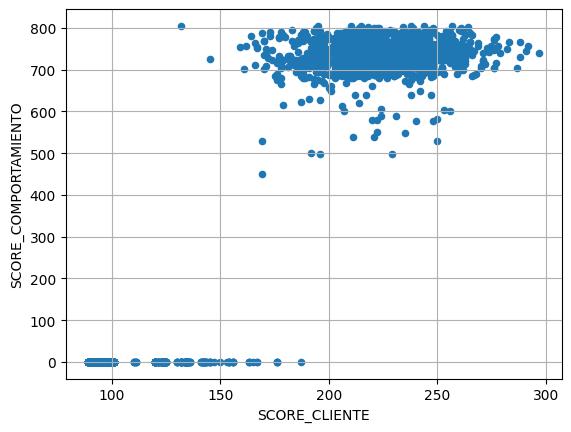

In [ ]:
df_scores = df_clean[['SCORE_CLIENTE', 'SCORE_COMPORTAMIENTO']]
df_scores.plot(kind='scatter',
               x='SCORE_CLIENTE',
               y='SCORE_COMPORTAMIENTO',
               grid=True)